# Exercise 05.1

The ground state and first excited state wave functions of an the Hydrogen atom are given by:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$

$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
We used the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ in Cartesian coordinates using an uniform transition probability $T(\mathbf{x}|\mathbf{y})$. 

In a Metropolis algorithm the stochastic transfer matrix that governs the evolution of the system can be written as $K(\mathbf{x}|\mathbf{y})=T(\mathbf{x}|\mathbf{y}) \cdot A(\mathbf{x}|\mathbf{y})$. We are in $\mathbf{x}$ and we generate a new position $\mathbf{y}$ using the trial transition probability $T$ which is uniform in $[-\delta,\delta]$. We will accept the proposed move with acceptance probability $A$. Starting from a probability distribution $d_1(\mathbf x)$ we build a non stationary Markov process characterized by the sequence of marginal distributions: $$d_{n+1}(\mathbf{x})= \int K(\mathbf x|\mathbf{y})d_n(\mathbf y)$$
If we want to sample $p(\mathbf x)$ we have to find a regular stochastic kernel $K$ such that $p(\mathbf x)$ is invariant for $K$, i.e. $$p(\mathbf{x})= \int K(\mathbf x|\mathbf{y})p(\mathbf y)$$  The theory guarantees that $$p(\mathbf{x})= \lim_{n \to \infty}d_{n+1}(\mathbf{x})= \lim_{n \to \infty} \int K(\mathbf x|\mathbf{y})d_n(\mathbf y)$$ It is easy to show that if the detailed balance $K(\mathbf x|\mathbf{y})p(\mathbf y) = K(\mathbf y|\mathbf{x})p(\mathbf x)$ is fulfilled, then $p(\mathbf x)$ is invariant for $K$.

In our case we choose an acceptance probability that fulfils the detailed balance: $$A(\mathbf{x}|\mathbf{y})=min\bigg[1,\frac{T(\mathbf y|\mathbf{x})p(\mathbf x)}{T(\mathbf x|\mathbf{y})p(\mathbf y)}\bigg]= min\bigg[1,\frac{p(\mathbf x)}{p(\mathbf y)}\bigg]= min\bigg[1,\frac{|\Psi(\mathbf x)|^2}{|\Psi(\mathbf y)|^2}\bigg]$$
where we used the fact that for our trial transition probability $T(\mathbf x|\mathbf{y})=T(\mathbf y|\mathbf{x})$.

- in order to obtain $50\%$ of acceptance I used a function that performs $10^3$ Monte Carlo steps and calculates the acceptance rate $A$. Beginning with $\delta=0.1$, if $A>0.55$ or $A<0.45$ it increases $\delta$ by a quantity $0.1$ and restart. This mechanism ends when we find a value of $\delta$ such that $A \sim 50\% $.
- in order to equilibrate we perform $500$ Monte Carlo steps before starting the measurements.
- a reasonable starting point for $\Psi_{1,0,0}$ is $\mathbf r_0^{(1s)}=(0,0,0)$, for $\Psi_{2,1,0}$ is $\mathbf r_0^{(2p)}=(0,0,1)$
- we repeate the simulations using a multivariate transition probability and we find that the results are almost the same.
- as we wrote in *Lecture_01* the measurements of a Metropolis Monte Carlo simulation are correlated. The blocking method is used to avoid this problem. Indeed if the blocks are big enough, block averages are independent and the Central Limit Theorem holds. Blocks must be longer then the Monte Carlo correlation time (see *Lecture_07*). Here we perform simulations of $10^6$ MC steps divided in $100$ blocks.

## 1s wave function

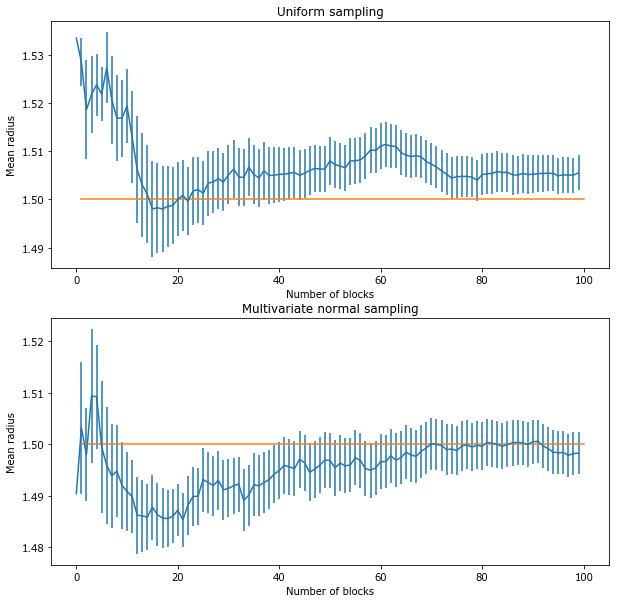

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x1, y1, error1 = np.loadtxt("Ex_05.1/Figures/1sU_mean_radius.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
x2, y2, error2 = np.loadtxt("Ex_05.1/Figures/1sG_mean_radius.txt", usecols=(0,1,2), delimiter='\t', unpack='true')

f, axarr = plt.subplots(2,1, figsize=(10,10))

axarr[0].errorbar(x1,y1,yerr=error1)
axarr[0].plot([1,50,100], [1.5,1.5,1.5])
axarr[0].set(xlabel='Number of blocks')
axarr[0].set(ylabel='Mean radius')
axarr[0].set(title='Uniform sampling')

axarr[1].errorbar(x2,y2,yerr=error2)
axarr[1].plot([1,50,100], [1.5,1.5,1.5])
axarr[1].set(xlabel='Number of blocks')
axarr[1].set(ylabel='Mean radius')
axarr[1].set(title='Multivariate normal sampling')


plt.show()

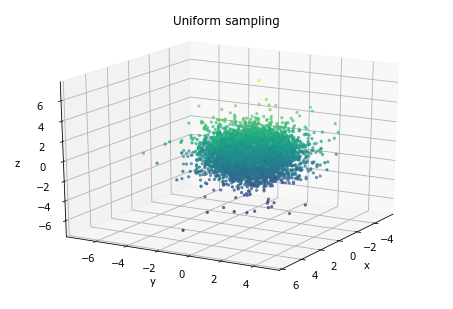

In [43]:
X1, Y1, Z1 = np.loadtxt("Ex_05.1/Figures/1sU_actual_pos_dist.txt", usecols=(1,2,3), delimiter='\t', unpack='true')

fig = plt.figure()
fig.suptitle('Uniform sampling')
ax = Axes3D(fig)
ax.scatter(X1, Y1, Z1, c=Z1, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20, 30)

plt.show()

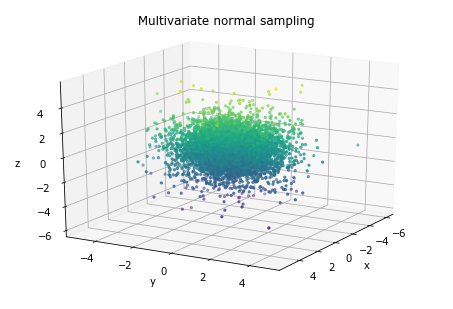

In [44]:
X2, Y2, Z2 = np.loadtxt("Ex_05.1/Figures/1sG_actual_pos_dist.txt", usecols=(1,2,3), delimiter='\t', unpack='true')

fig = plt.figure()
fig.suptitle('Multivariate normal sampling')
ax = Axes3D(fig)
ax.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20, 30)

plt.show()

If we start the simulation very far from the origin, e.g $ \mathbf {r_0}=(100,100,100)$ we need a lot of steps in order to equilibrate and to sample the correct distribution. But if we are patient enough we are able sample correctly $|\Psi_{1,0,0}(x,y,z)|^2$.

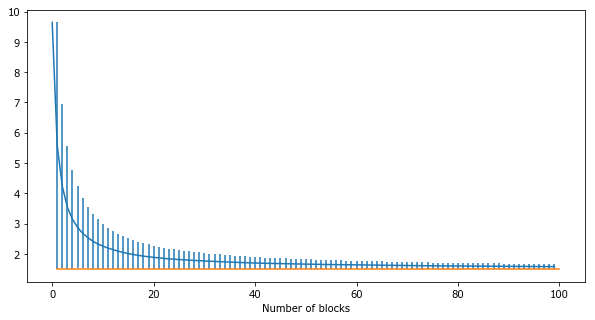

In [49]:
x1, y1, error1 = np.loadtxt("Ex_05.1/Figures/far_mean_radius.txt", usecols=(0,1,2), delimiter='\t', unpack='true')

plt.figure(figsize=(10,5))

plt.errorbar(x1,y1,yerr=error1)
plt.plot([1,50,100], [1.5,1.5,1.5])
plt.xlabel('Number of blocks')
plt.ylabel=('Mean radius')
#axarr[0].set(title='Uniform sampling')

plt.show()

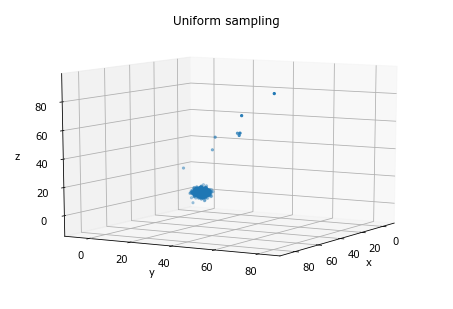

In [53]:
X, Y, Z = np.loadtxt("Ex_05.1/Figures/far_actual_pos_dist.txt", usecols=(1,2,3), delimiter='\t', unpack='true')

fig = plt.figure()
fig.suptitle('Uniform sampling')
ax = Axes3D(fig)
ax.scatter(X, Y, Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

## 2p wave function

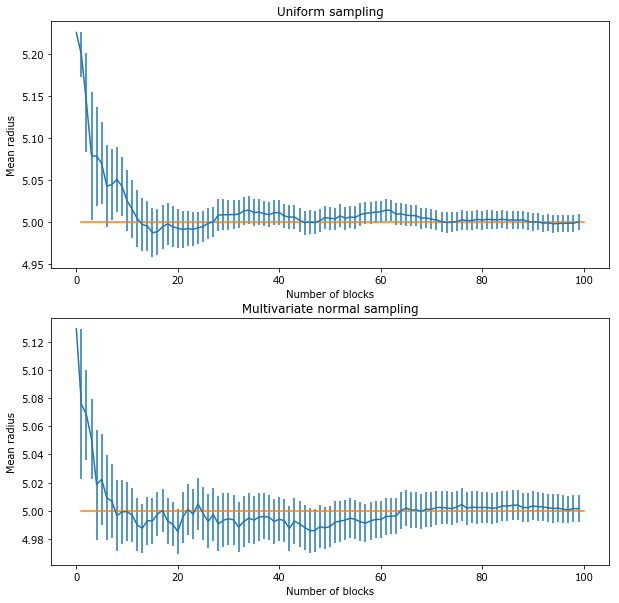

In [31]:
x1, y1, error1 = np.loadtxt("Ex_05.1/Figures/2pU_mean_radius.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
x2, y2, error2 = np.loadtxt("Ex_05.1/Figures/2pG_mean_radius.txt", usecols=(0,1,2), delimiter='\t', unpack='true')

f, axarr = plt.subplots(2,1, figsize=(10,10))

axarr[0].errorbar(x1,y1,yerr=error1)
axarr[0].plot([1,50,100], [5,5,5])
axarr[0].set(xlabel='Number of blocks')
axarr[0].set(ylabel='Mean radius')
axarr[0].set(title='Uniform sampling')

axarr[1].errorbar(x2,y2,yerr=error2)
axarr[1].plot([1,50,100], [5,5,5])
axarr[1].set(xlabel='Number of blocks')
axarr[1].set(ylabel='Mean radius')
axarr[1].set(title='Multivariate normal sampling')


plt.show()

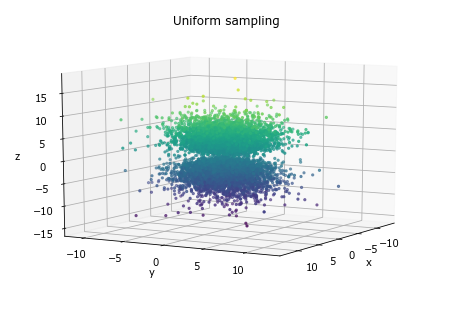

In [33]:
X1, Y1, Z1 = np.loadtxt("Ex_05.1/Figures/2pU_actual_pos_dist.txt", usecols=(1,2,3), delimiter='\t', unpack='true')

fig = plt.figure()
fig.suptitle('Uniform sampling')
ax = Axes3D(fig)
ax.scatter(X1, Y1, Z1, c=Z1, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

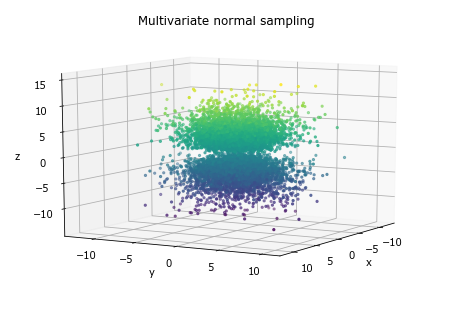

In [35]:
X2, Y2, Z2 = np.loadtxt("Ex_05.1/Figures/2pG_actual_pos_dist.txt", usecols=(1,2,3), delimiter='\t', unpack='true')

fig = plt.figure()
fig.suptitle('Multivariate normal sampling')
ax = Axes3D(fig)
ax.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()